In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataset import dataset
# how many rows to print
pd.set_option('display.max_rows', 10)

In [4]:
fesb_symm = 'mmm'
eiger_ni25 = dataset('0347.hkl', symmetry=fesb_symm)
eiger_w25 = dataset('0349.hkl', symmetry=fesb_symm)
eiger_w50 = dataset('0350.hkl', symmetry=fesb_symm)

pilatus_w50 = dataset('0373.hkl', symmetry=fesb_symm)
pilatus_all = dataset('0376.hkl', symmetry=fesb_symm)

New dataset: 0347.hkl
Setting symmetry to mmm for 0347.hkl
No. of symops: 8
Length of data loaded: 831
Length of reduced data: 229
New dataset: 0349.hkl
Setting symmetry to mmm for 0349.hkl
No. of symops: 8
Length of data loaded: 870
Length of reduced data: 231
New dataset: 0350.hkl
Setting symmetry to mmm for 0350.hkl
No. of symops: 8
Length of data loaded: 916
Length of reduced data: 230
New dataset: 0373.hkl
Setting symmetry to mmm for 0373.hkl
No. of symops: 8
Length of data loaded: 715
Length of reduced data: 193
New dataset: 0376.hkl
Setting symmetry to mmm for 0376.hkl
No. of symops: 8
Length of data loaded: 664
Length of reduced data: 189


In [8]:
# merge the datasets based on the hkl-tuples
data = eiger_ni25.data.merge(eiger_w50.data, how='inner', on=['hkl'], suffixes=('_eig','_pil'), indicator=True)
# calculate the scalar between them as the sum(intensity1*intensity2)/sum(intensity1)
# and scale intensity1 to intensity2
scale = np.nansum(data['intensity_eig']*data['intensity_pil'])/np.nansum(np.square(data['intensity_eig']))
data['intensity_eig'] *= scale

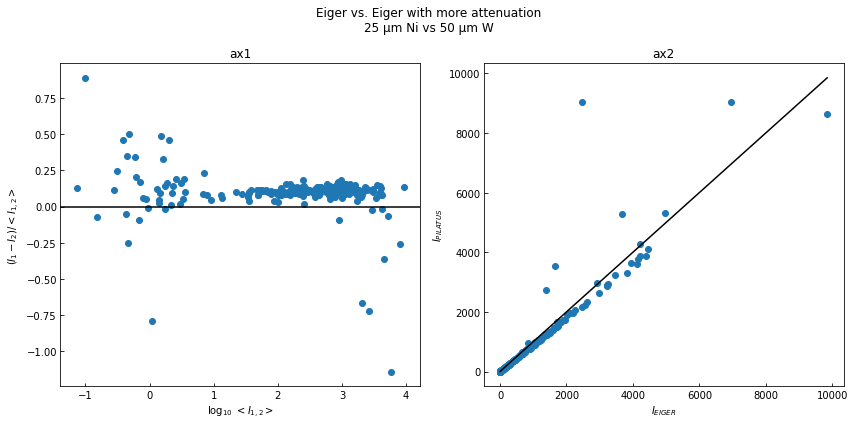

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

data_mean = (data['intensity_eig'] + data['intensity_pil'])/2
x = np.log10(data_mean)

y = (data['intensity_eig']-data['intensity_pil'])/data_mean
ax1.axhline(y=0, c='k')
ax1.scatter(x, y)

ax1.tick_params(direction='in')

ax1.set(xlabel=r'log$_{10}$ $<I_{1,2}>$',
        ylabel='($I_1 - I_2$)/$<I_{1,2}>$',
        title='ax1'
       
      )

# plot a straight line to the maximal value
ax2.plot([0, data['intensity_eig'].max()], [0, data['intensity_eig'].max()], c='k') 

ax2.scatter(data['intensity_eig'], data['intensity_pil'])
ax2.tick_params(direction='in')

ax2.set(xlabel='$I_{EIGER}$',
        ylabel='$I_{PILATUS}$',
        title='ax2'
       )



fig.suptitle('Eiger vs. Eiger with more attenuation\n25 µm Ni vs 50 µm W')
fig.tight_layout()

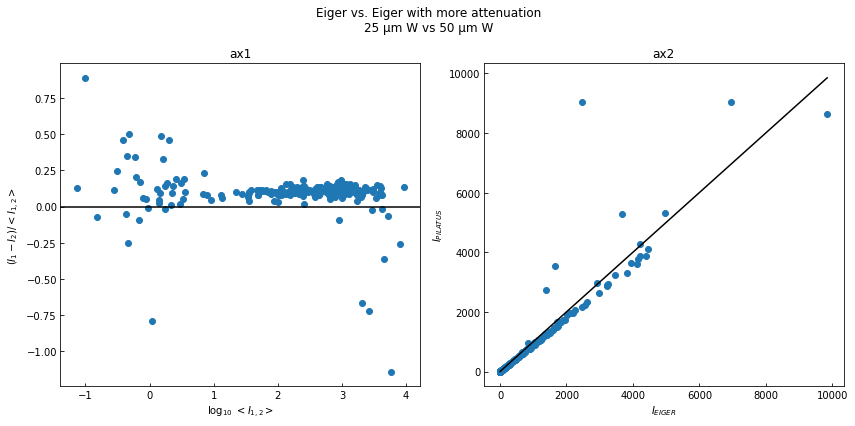

In [13]:
# merge the datasets based on the hkl-tuples
data = eiger_w25.data.merge(eiger_w50.data, how='inner', on=['hkl'], suffixes=('_eig','_pil'), indicator=True)
# calculate the scalar between them as the sum(intensity1*intensity2)/sum(intensity1)
# and scale intensity1 to intensity2
scale = np.nansum(data['intensity_eig']*data['intensity_pil'])/np.nansum(np.square(data['intensity_eig']))
data['intensity_eig'] *= scale

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

data_mean = (data['intensity_eig'] + data['intensity_pil'])/2
x = np.log10(data_mean)

y = (data['intensity_eig']-data['intensity_pil'])/data_mean
ax1.axhline(y=0, c='k')
ax1.scatter(x, y)

ax1.tick_params(direction='in')

ax1.set(xlabel=r'log$_{10}$ $<I_{1,2}>$',
        ylabel='($I_1 - I_2$)/$<I_{1,2}>$',
        title='ax1'
       
      )

# plot a straight line to the maximal value
ax2.plot([0, data['intensity_eig'].max()], [0, data['intensity_eig'].max()], c='k') 

ax2.scatter(data['intensity_eig'], data['intensity_pil'])
ax2.tick_params(direction='in')

ax2.set(xlabel='$I_{EIGER}$',
        ylabel='$I_{PILATUS}$',
        title='ax2'
       )



fig.suptitle('Eiger vs. Eiger with more attenuation\n25 µm W vs 50 µm W')
fig.tight_layout()

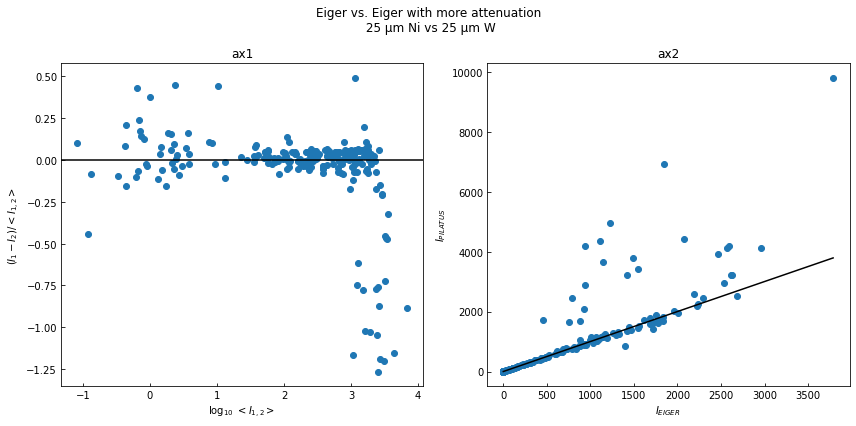

In [16]:
# merge the datasets based on the hkl-tuples
data = eiger_ni25.data.merge(eiger_w25.data, how='inner', on=['hkl'], suffixes=('_eig','_pil'), indicator=True)
# calculate the scalar between them as the sum(intensity1*intensity2)/sum(intensity1)
# and scale intensity1 to intensity2


scale = np.nansum(data['intensity_eig'][data['intensity_eig'] < 1000]*data['intensity_pil'][data['intensity_pil'] < 1000])/np.nansum(np.square(data['intensity_eig'][data['intensity_eig'] < 1000]))



data['intensity_eig'] *= scale

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

data_mean = (data['intensity_eig'] + data['intensity_pil'])/2
x = np.log10(data_mean)

y = (data['intensity_eig']-data['intensity_pil'])/data_mean
ax1.axhline(y=0, c='k')
ax1.scatter(x, y)

ax1.tick_params(direction='in')

ax1.set(xlabel=r'log$_{10}$ $<I_{1,2}>$',
        ylabel='($I_1 - I_2$)/$<I_{1,2}>$',
        title='ax1'
       
      )

# plot a straight line to the maximal value
ax2.plot([0, data['intensity_eig'].max()], [0, data['intensity_eig'].max()], c='k') 

ax2.scatter(data['intensity_eig'], data['intensity_pil'])
ax2.tick_params(direction='in')

ax2.set(xlabel='$I_{EIGER}$',
        ylabel='$I_{PILATUS}$',
        title='ax2'
       )



fig.suptitle('Eiger vs. Eiger with more attenuation\n 25 µm Ni vs 25 µm W')
fig.tight_layout()

fig.savefig('EigerNi25_EigerW50.png')

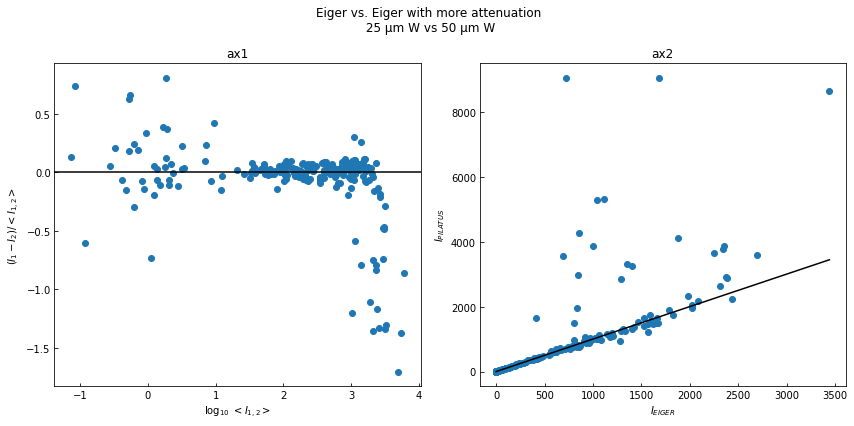

In [20]:
# merge the datasets based on the hkl-tuples
data = eiger_ni25.data.merge(eiger_w50.data, how='inner', on=['hkl'], suffixes=('_eig','_pil'), indicator=True)
# calculate the scalar between them as the sum(intensity1*intensity2)/sum(intensity1)
# and scale intensity1 to intensity2


scale = np.nansum(data['intensity_eig'][data['intensity_eig'] < 1000]*data['intensity_pil'][data['intensity_pil'] < 1000])/np.nansum(np.square(data['intensity_eig'][data['intensity_eig'] < 1000]))



data['intensity_eig'] *= scale

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

data_mean = (data['intensity_eig'] + data['intensity_pil'])/2
x = np.log10(data_mean)

y = (data['intensity_eig']-data['intensity_pil'])/data_mean
ax1.axhline(y=0, c='k')
ax1.scatter(x, y)

ax1.tick_params(direction='in')

ax1.set(xlabel=r'log$_{10}$ $<I_{1,2}>$',
        ylabel='($I_1 - I_2$)/$<I_{1,2}>$',
        title='ax1'
       
      )

# plot a straight line to the maximal value
ax2.plot([0, data['intensity_eig'].max()], [0, data['intensity_eig'].max()], c='k') 

ax2.scatter(data['intensity_eig'], data['intensity_pil'])
ax2.tick_params(direction='in')

ax2.set(xlabel='$I_{EIGER}$',
        ylabel='$I_{PILATUS}$',
        title='ax2'
       )



fig.suptitle('Eiger vs. Eiger with more attenuation\n 25 µm W vs 50 µm W')
fig.tight_layout()
fig.savefig('EigerNi25_EigerW50.png')

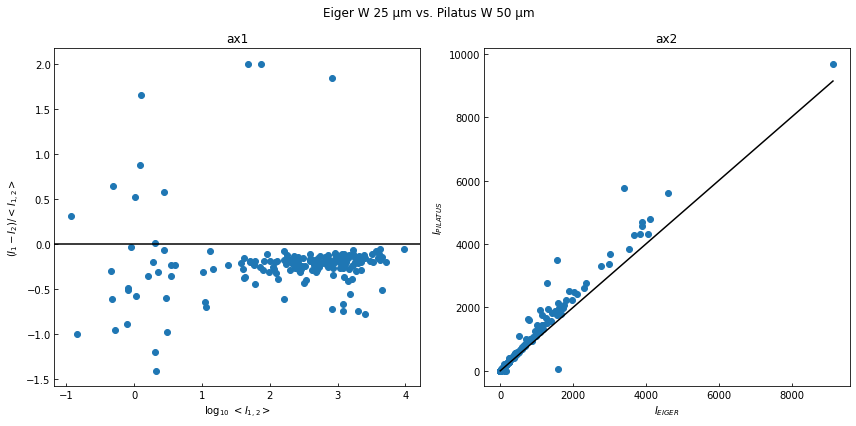

In [19]:
# merge the datasets based on the hkl-tuples
data = eiger_w25.data.merge(pilatus_w50.data, how='inner', on=['hkl'], suffixes=('_eig','_pil'), indicator=True)
# calculate the scalar between them as the sum(intensity1*intensity2)/sum(intensity1)
# and scale intensity1 to intensity2


scale = np.nansum(data['intensity_eig'][data['intensity_eig'] < 1000]*data['intensity_pil'][data['intensity_pil'] < 1000])/np.nansum(np.square(data['intensity_eig'][data['intensity_eig'] < 1000]))



data['intensity_eig'] *= scale

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

data_mean = (data['intensity_eig'] + data['intensity_pil'])/2
x = np.log10(data_mean)

y = (data['intensity_eig']-data['intensity_pil'])/data_mean
ax1.axhline(y=0, c='k')
ax1.scatter(x, y)

ax1.tick_params(direction='in')

ax1.set(xlabel=r'log$_{10}$ $<I_{1,2}>$',
        ylabel='($I_1 - I_2$)/$<I_{1,2}>$',
        title='ax1'
       
      )

# plot a straight line to the maximal value
ax2.plot([0, data['intensity_eig'].max()], [0, data['intensity_eig'].max()], c='k') 

ax2.scatter(data['intensity_eig'], data['intensity_pil'])
ax2.tick_params(direction='in')

ax2.set(xlabel='$I_{EIGER}$',
        ylabel='$I_{PILATUS}$',
        title='ax2'
       )



fig.suptitle('Eiger W 25 µm vs. Pilatus W 50 µm')
fig.tight_layout()
fig.savefig('EigerW25_PilatusW50.png')